# Sismique active S : Visualisation simple

In [37]:
import numpy as np
import matplotlib.pyplot as plt

import os

import pandas as pd

from scipy import stats

import ipywidgets as widgets
from ipywidgets import interactive

In [38]:
from geometry import *

Text(0, 0.5, 'Northing (m)')

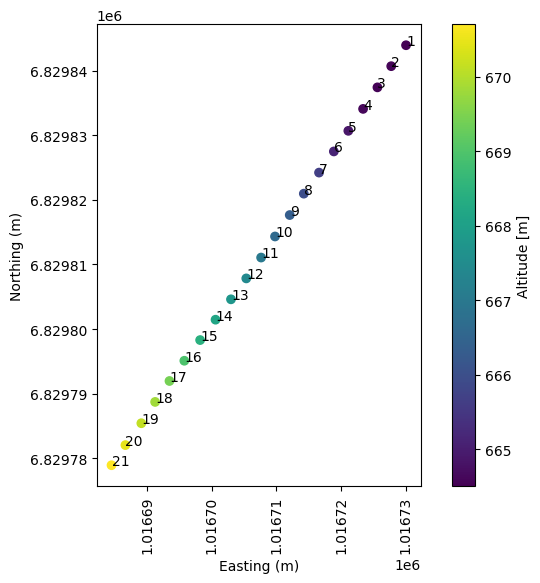

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for k, row in enumerate(gnss.iterrows()):
    k, serie = row
    plt.annotate(k, (serie[' Y '], serie[' X ']))
ax.set_aspect('equal', adjustable='box')

im = plt.scatter(gnss[' Y '], gnss[' X '], c=gnss['A'])
cb = plt.colorbar(im, label='Altitude [m]')

ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=90)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')

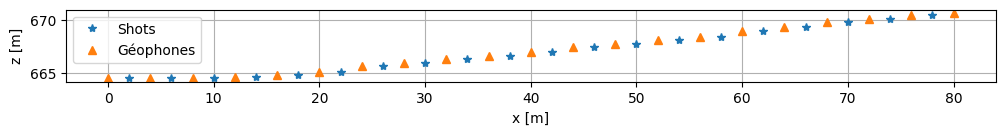

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
plt.plot(x_shots, y_shots, '*', label='Shots')
plt.plot(x_geophs, y_geophs, '^', label='Géophones')
plt.grid()
ax.set_aspect('equal', adjustable='box')
plt.xlabel('x [m]')
plt.ylabel('z [m]')
plt.legend()

## Min max

In [41]:
xy = np.loadtxt('data/sgt/positions.txt')
s = np.loadtxt('data/sgt/shots.txt', dtype=int)
g = np.loadtxt('data/sgt/geophones.txt', dtype=int)
t = np.loadtxt('data/sgt/times.txt')

In [72]:
def scatterplt(x_shot=12.75, geophones1=[0, -1], geophones2=[0, -1]):
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    ax.scatter(x_shot, 0, c='red', marker='*')
    ax.scatter(x_geophs, [0]*len(x_geophs), c='green', marker='^')
    
    vs = [0, 0]
    interc = [0, 0]
    xcs = [0, 0]
    geophones_ranges = (geophones1, geophones2)
    for k, geophones in enumerate(geophones_ranges):
        ii = np.where(xy[s-1][:, 0] == x_shot)
        x_geoph = xy[g[ii]-1][:, 0]
        times = t[ii]
        jj = np.where((x_geoph >= geophones[0]) & (x_geoph <= geophones[1]))
        xreg = x_geoph[jj]
        tslice = times[jj]
        slope, intercept, r, p, std_err = stats.linregress(xreg - x_shot, tslice)
        treg = slope * (xreg - x_shot) + intercept
        v = abs(1/slope)
        vs[k] = v
        interc[k] = intercept
        xcs[k] = geophones[0] if slope > 0 else geophones[1]
        
        print(f'v={v} m/s intercept={intercept} r={r}')
        #print(f'[{x_shot}, {1/slope}, {geophones}]')
        
        ax.scatter(x_geoph, times, c='black', marker='+')
        plt.axvline(geophones[0], linestyle=':', color='grey')
        plt.axvline(geophones[1], linestyle=':', color='grey')
        ax.plot(xreg, treg, label=f'v={v:.1f} m/s')
    
    k1, k2 = np.argsort(vs)
    v1, v2 = vs[k1], vs[k2]
    tintercept = interc[k2]
    xcross = xcs[k2]
    z = tintercept*v1*v2/(2*np.sqrt(v2**2-v1**2))
    print(z)
    z = xcross/2*np.sqrt((v2-v1)/(v2+v1))
    print(z)
    print([geophones_ranges[k1], geophones_ranges[k2]])
    ax.set_xlabel('Distance [m]')
    ax.set_ylabel('Traveltime [s]')
    ax.legend()
    ax.invert_yaxis()
    
    plt.show()

In [73]:
#xcross/2*sqrt((v2-v1)/(v2+v1))

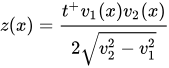

In [74]:
interactive_plot = interactive(scatterplt, x_shot=widgets.SelectionSlider(
    options=list(x_shots),
    value=x_shots[ns//2],
    description='Position du shot',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
), geophones1=widgets.IntRangeSlider(
    value=[x_geophs[0], x_geophs[ng//3]],
    min=np.min(x_geophs),
    max=np.max(x_geophs),
    step=dx,
    description='Geophones',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
), geophones2=widgets.IntRangeSlider(
    value=[x_geophs[2*ng//3], x_geophs[-1]],
    min=np.min(x_geophs),
    max=np.max(x_geophs),
    step=dx,
    description='Geophones',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
))
interactive_plot

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


In [179]:
velocity_grange = [[(2, 8), (8, 48), (48, 80)],
 [(6, 12), (12, 48), (48, 80)],
 [(10, 16), (16, 52), (52, 80)],
 [(14, 20), (20, 52), (52, 80)],
 [(18, 24), (24, 60), (60, 80)],
 [(22, 28), (28, 60), (60, 80)],
 [(26, 32), (32, 64), (64, 80)],
 [(30, 36), (36, 64), (64, 80), (24, 30), (12, 24), (0, 12)],
 [(28, 34), (12, 28), (0 , 12), (34, 44), (44, 64), (64, 80)],
 [(38, 44), (44, 64), (64, 80), (32, 38), (12, 32), (0, 12)],
 [(42, 48), (16, 32), (0, 16), (32, 42), (48, 64), (64, 80)],
 [(46, 52), (52, 64), (64, 80), (40, 46), (16, 40), (0, 16)],
 [(44, 50), (20, 44), (0, 20)],
 [(48, 54), (16, 48), (0, 16)],
 [(52, 58), (20, 52), (0, 20)],
 [(56, 62), (24, 56), (0, 24)],
 [(66, 72), (20, 56), (0, 20)],
 [(64, 70), (24, 64), (0, 24)],
 [(68, 74), (32, 68), (0, 32)],
 [(72, 78), (32, 72), (0, 32)]]

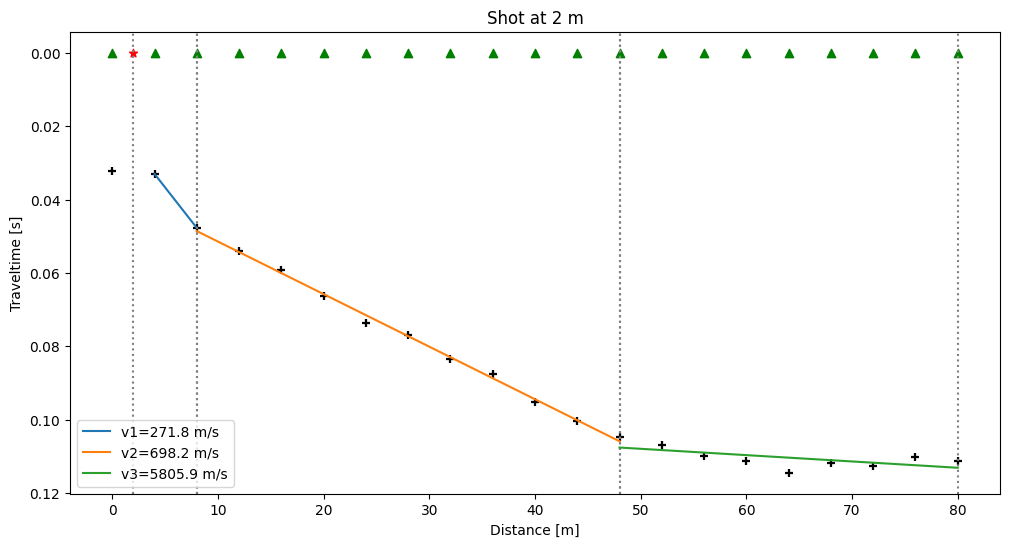

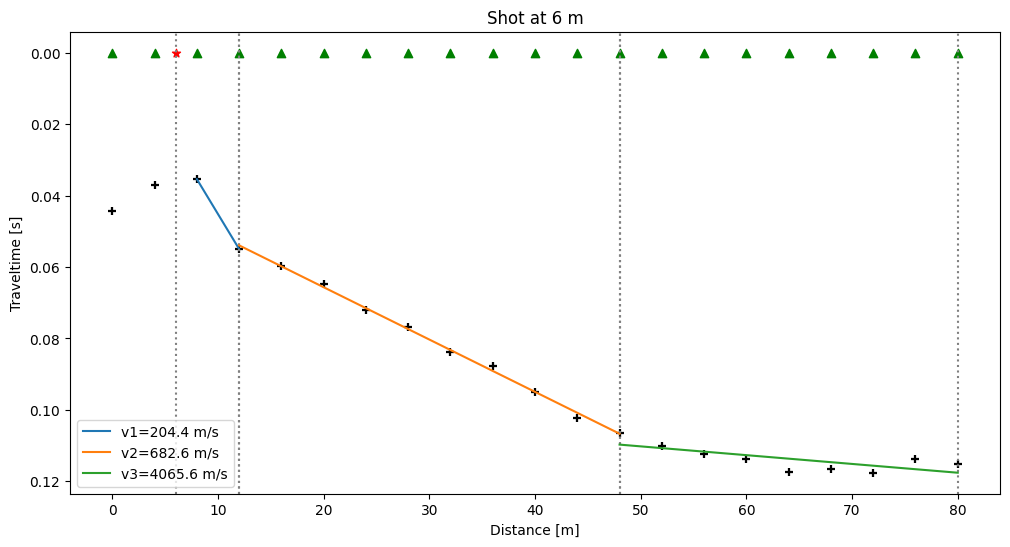

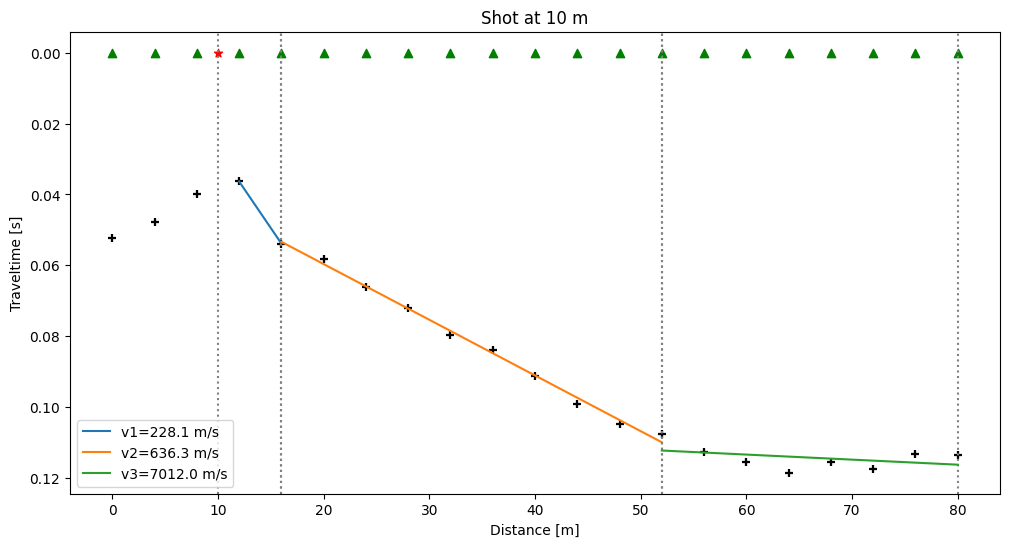

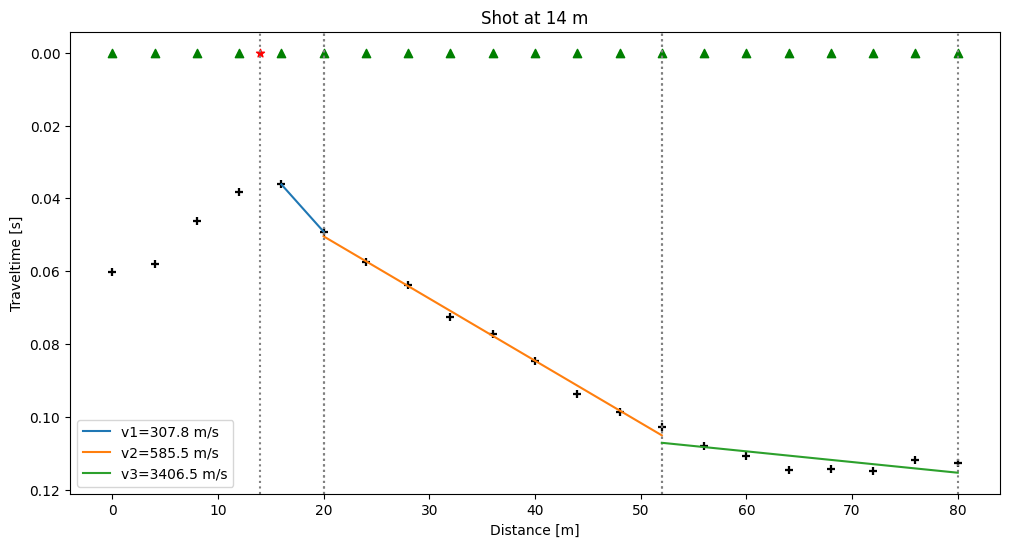

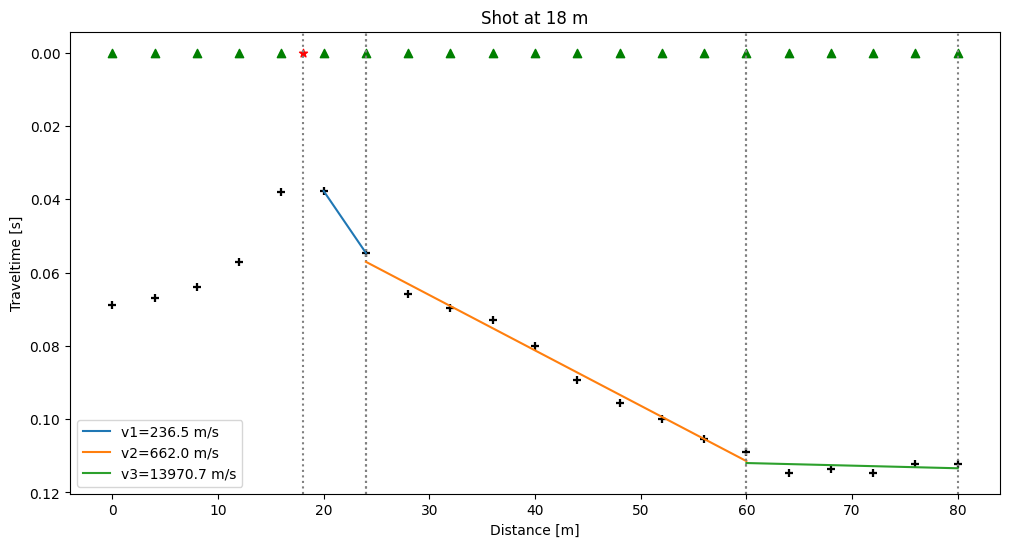

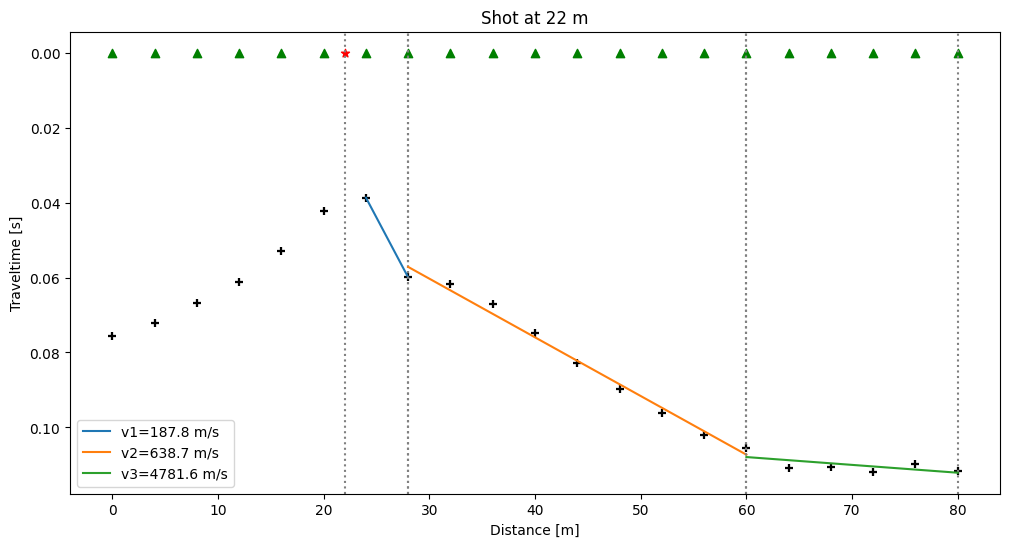

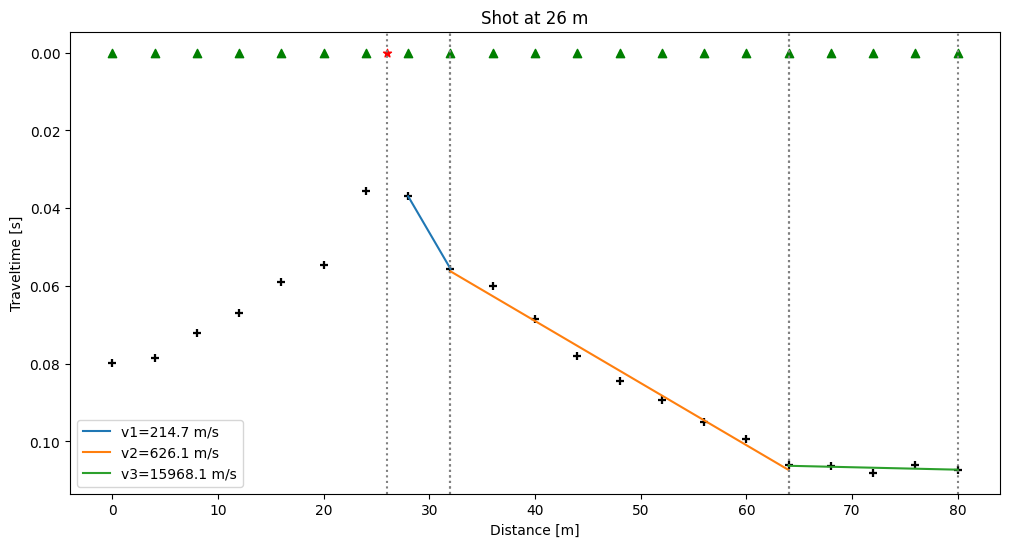

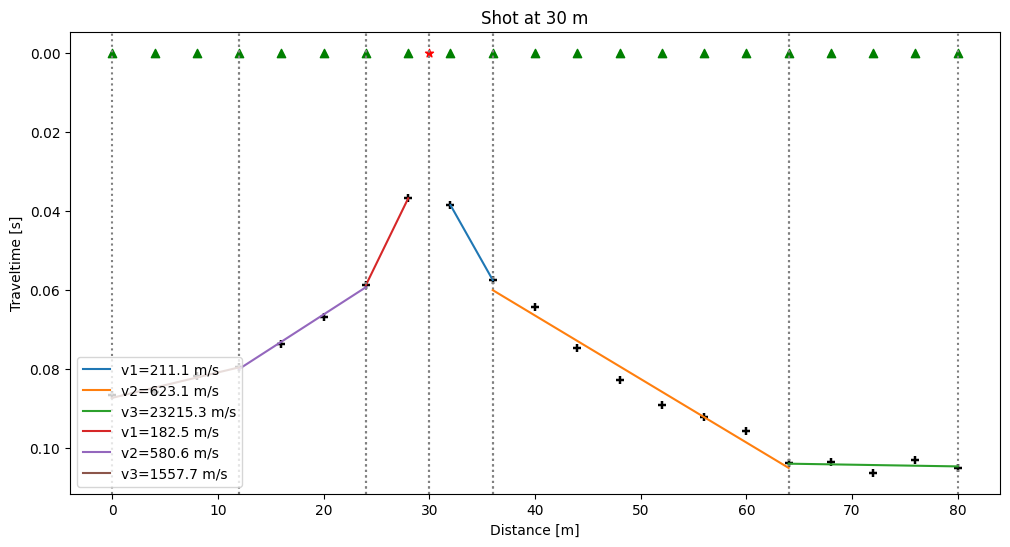

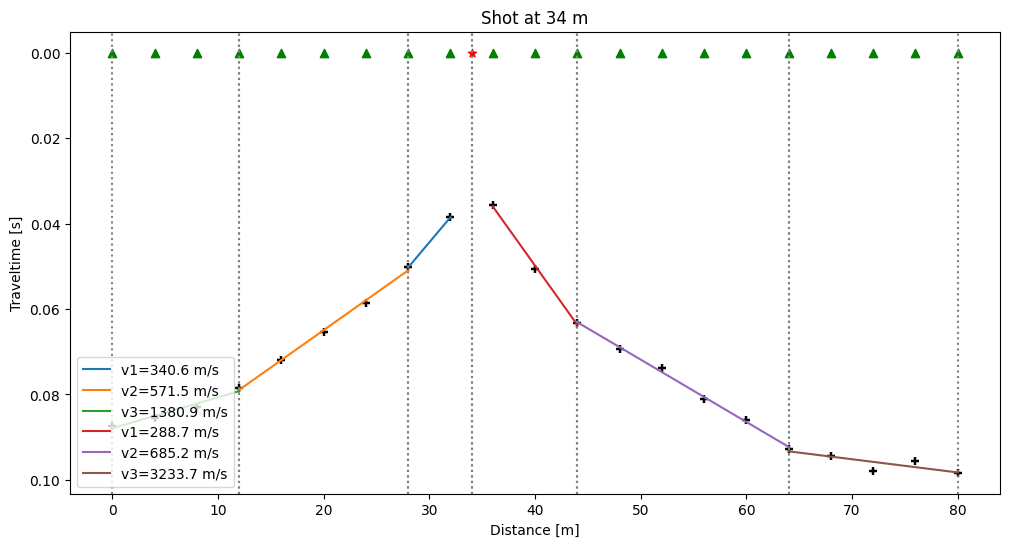

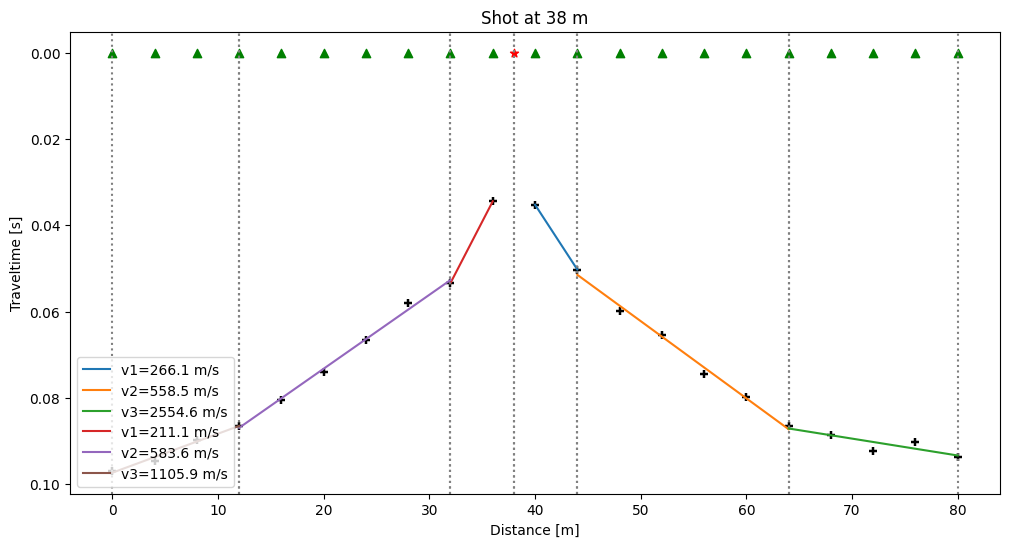

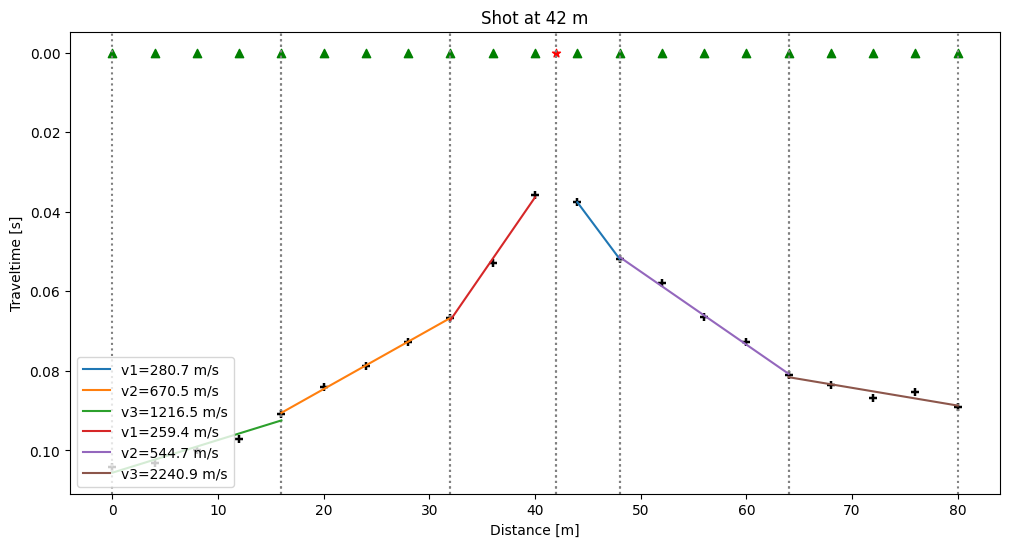

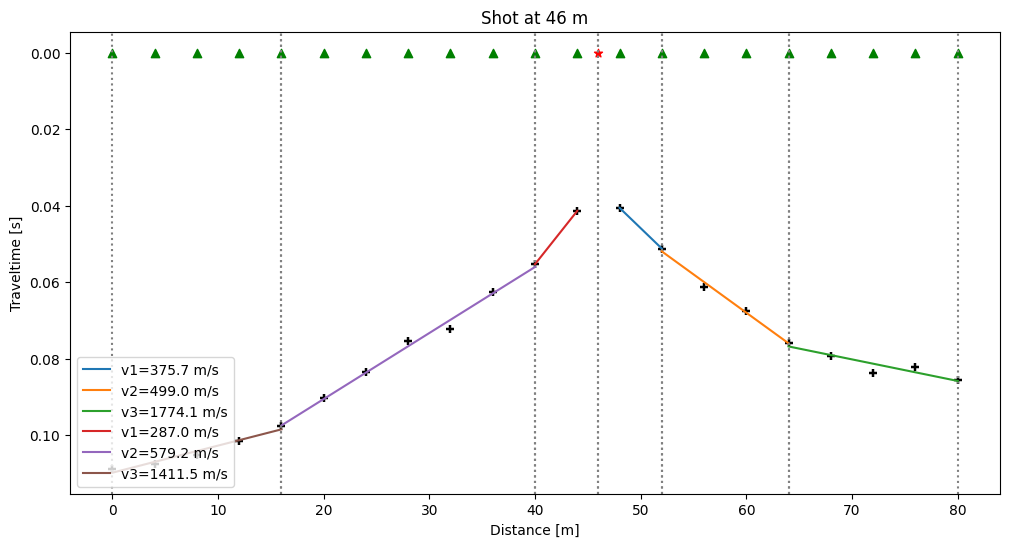

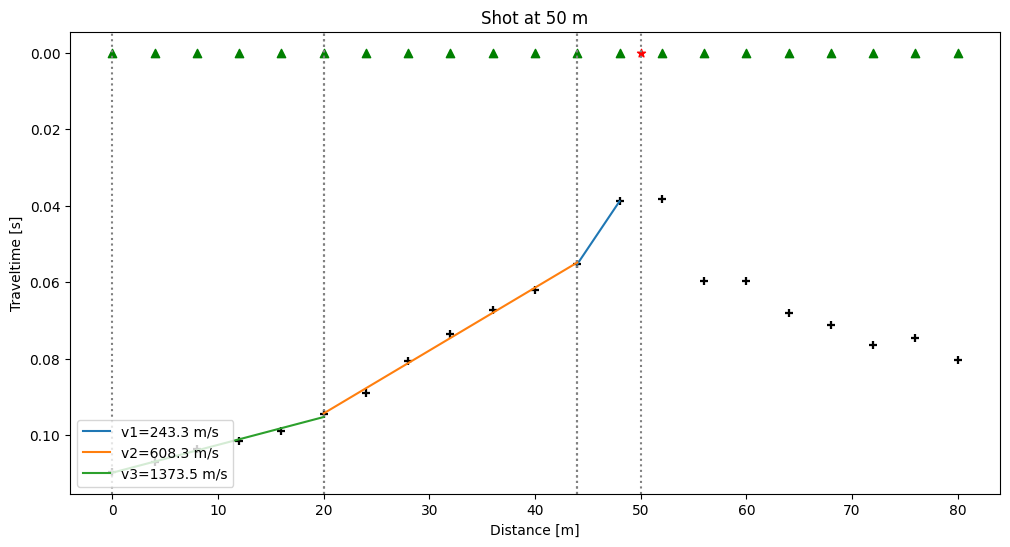

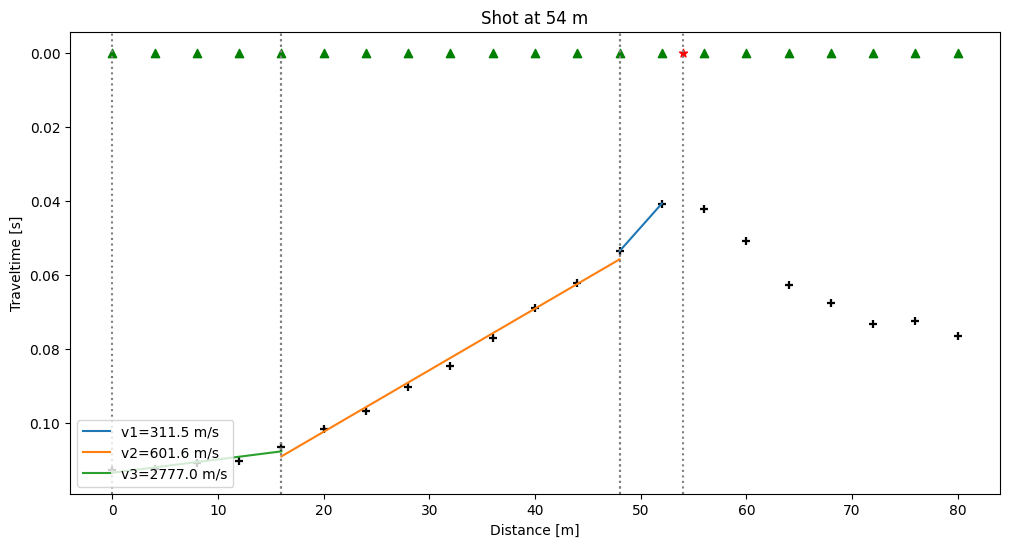

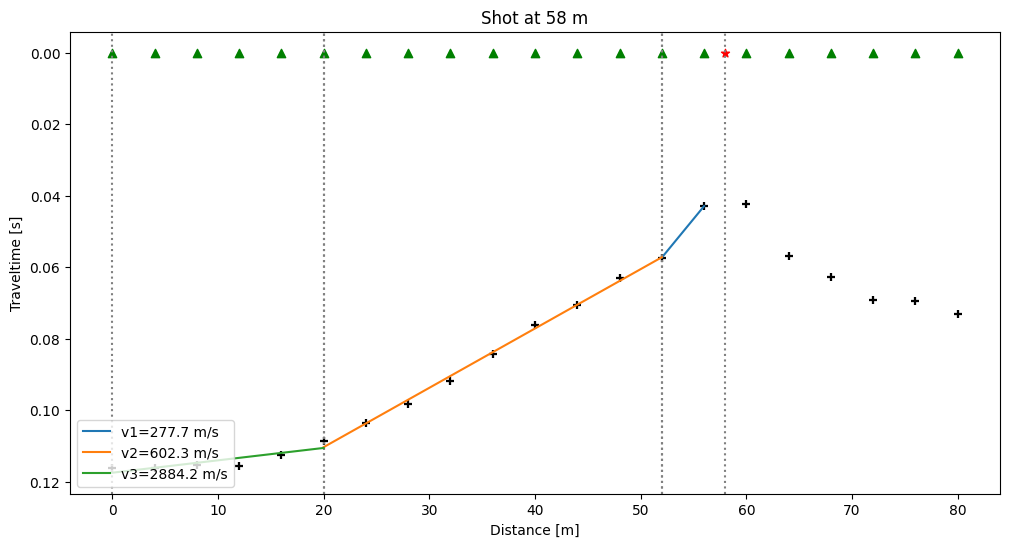

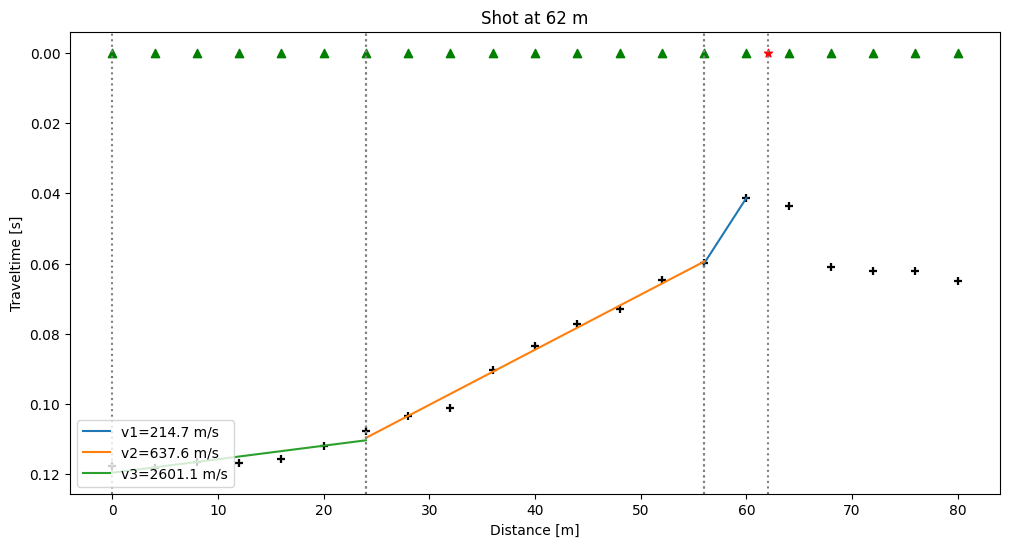

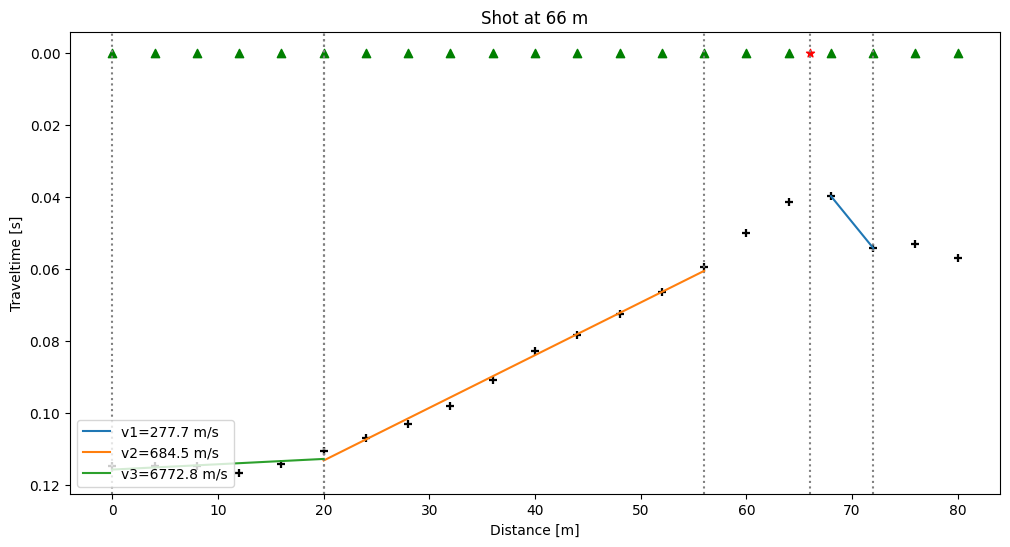

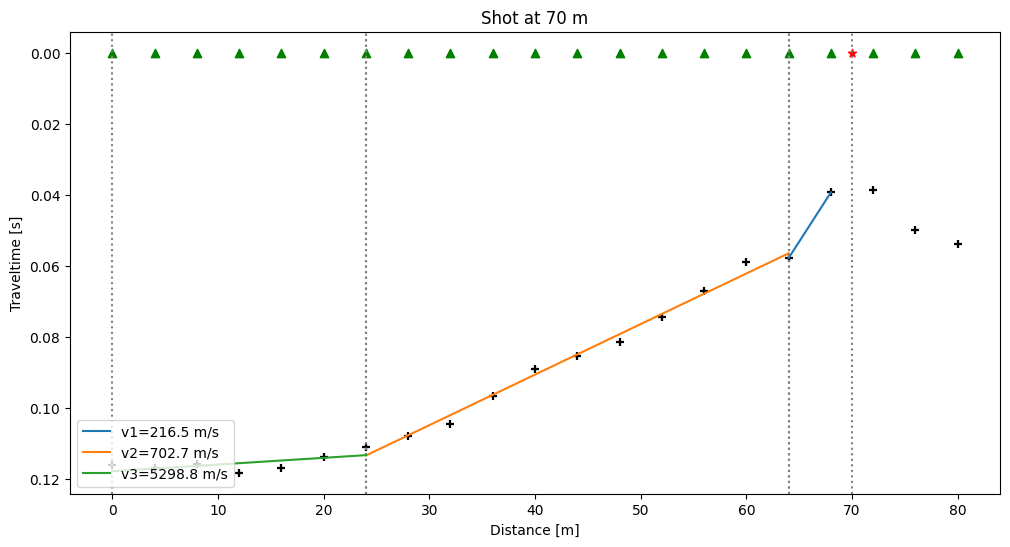

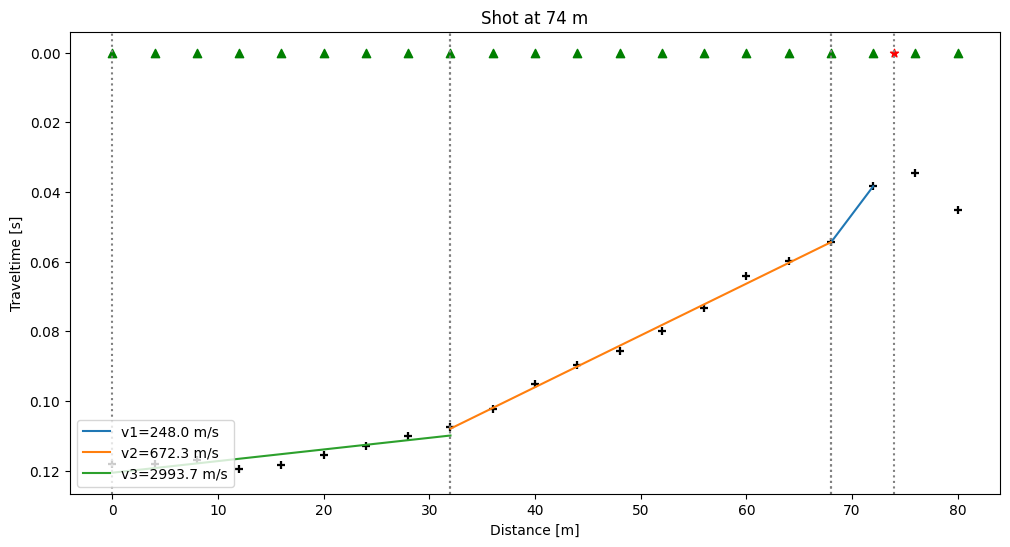

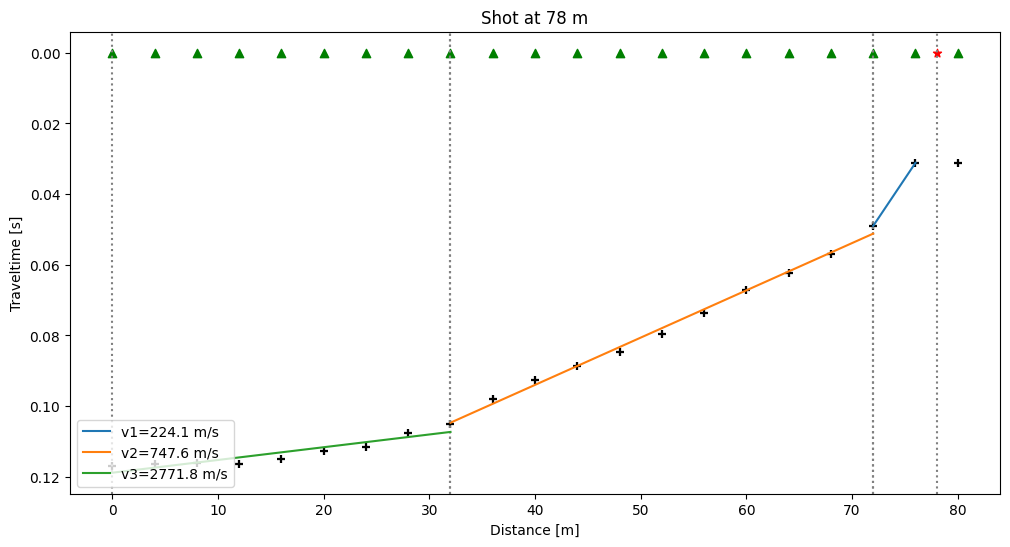

In [180]:
v_all = []
for i, x_shot in enumerate(x_shots):

    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    plt.title(f'Shot at {x_shot} m')
    ax.scatter(x_shot, 0, c='red', marker='*')
    ax.scatter(x_geophs, [0]*len(x_geophs), c='green', marker='^')

    vs = []
    interc = []
    xcs = []

    for k, geophones in enumerate(velocity_grange[i]):
        ii = np.where(xy[s-1][:, 0] == x_shot)
        x_geoph = xy[g[ii]-1][:, 0]
        times = t[ii]
        jj = np.where((x_geoph >= geophones[0]) & (x_geoph <= geophones[1]))
        xreg = x_geophs[jj]
        tslice = times[jj]
        slope, intercept, r, p, std_err = stats.linregress(xreg - x_shot, tslice)
        treg = slope * (xreg - x_shot) + intercept
        v = abs(1/slope)
        vs.append(v)
        interc.append(intercept)
        xcs.append(geophones[0] if slope > 0 else geophones[1])

        #print(f'v={v} m/s intercept={intercept} r={r}')

        ax.scatter(x_geoph, times, c='black', marker='+')
        plt.axvline(geophones[0], linestyle=':', color='grey')
        plt.axvline(geophones[1], linestyle=':', color='grey')
        ax.plot(xreg, treg, label=f'v{k%3+1}={v:.1f} m/s')

    if len(vs) > 3:
        vs = [(vs[j]+vs[j+3])/2 for j in range(3)]
    ks = np.argsort(vs)
    k1, k2, k3 = ks
    v1, v2, v3 = vs[k1], vs[k2], vs[k3]
    v_all.append(vs)
    tintercept = interc[k2]
    xcross = xcs[k2]
    z = tintercept*v1*v2/(2*np.sqrt(v2**2-v1**2))
    #print(z)
    z = xcross/2*np.sqrt((v2-v1)/(v2+v1))
    #print(z)
    ax.set_xlabel('Distance [m]')
    ax.set_ylabel('Traveltime [s]')
    ax.legend(loc='lower left')
    ax.invert_yaxis()
    fig.savefig(f'figures/velocity_slopes/slopes_shot_{x_shot:02d}.png')

In [184]:
v_all = np.array(v_all)

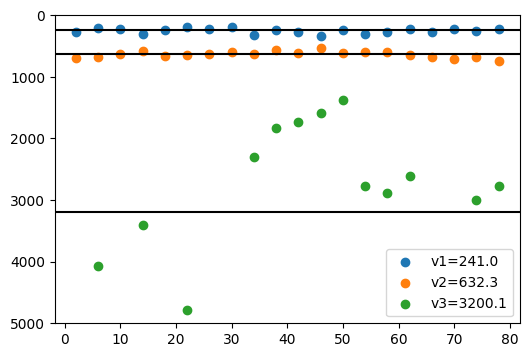

In [204]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for k in range(3):
    v = np.median(v_all[:, k])
    plt.axhline(v, c='k')
    plt.scatter(x_shots, v_all[:, k], label=f'v{k+1}={v:.1f}')
plt.ylim(5000, 0)
plt.legend()